# NLP Assignment 1
Samarth Ramesh

BMC201722

In [ ]:
import json
import os
import re
from matplotlib import pyplot as plt
from IPython.display import HTML, display
import time
import math
import csv

In [ ]:
def progress(value, max=100):
  '''
  This defines the progress bar used later.
  '''
  return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

In [ ]:
def extract_text(filename,output_as_list=False):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - if output_as_list = True
                list of all the above values,
             else
                text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if available
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']


    if output_as_list:
            return [paper_id,title,abstract,body_text]
    else:
        return (title + ' ' + abstract + ' ' + body_text + ' ')


In [ ]:
'''
Each paper is extracted from the relevant json file
and for each paper the paper_id, title, abstract and body_text is extracted
and added to the papers_data list.
'''

papers_data = []
i = 0
out = display(progress(0, 350), display_id=True)
for filename in os.listdir("/content/drive/MyDrive/Colab Data/NLP 1 Data"):
  paper = extract_text("/content/drive/MyDrive/Colab Data/NLP 1 Data/" + filename, output_as_list= True)
  papers_data.append(paper)
  i+=1
  out.update(progress(i, 350))

In [ ]:
def split_sentences(text):
  '''
  This function takes the body of text and splits the text by full stops.
  Then the sentences are stripped of empty space at the start end and then
  convert the sentence into lower case. It returns a list of sentences.
  '''
  final = []
  sentences = text.split('.')
  for sentence in sentences:
    if sentence != []:
      final.append(sentence.strip().lower())
  return final

def remove_brackets(sentence):
  '''
  This function uses regular expressions to remove any part
  of the sentences contained between brackets.
  '''
  return re.sub(".[\(\[].*?[\)\]]", "", sentence)

def remove_punc(sentence):
  '''
  Removes all characters other than letters, numbers,
  hyphens, apostrophes and empty spaces.
  '''
  whitelist = set("abcdefghijklmnopqrstuvwxyz '-1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ")
  return ''.join(filter(whitelist.__contains__, sentence))

def clean_sentence(sentence):
  '''
  Applies the remove_brackets and remove_punc functions
  to a sentence to convert the raw sentence to a sentence
  that can be used to train a language model.
  '''
  sentence = remove_brackets(sentence)
  sentence = remove_punc(sentence)
  return sentence

## Pre-processing Steps

Each paper is split into sentences and converted completely into lower case.

The papers have many abbreviations and citations both of which are written in brackets. They don't possess much semantic information for the language model so they can be removed. So anything written in brackets is removed from the sentences.

Next all the punctuations except hyphens and apostrophes are removed leaving only the words in lower case which can be easily used for the language model.

In [ ]:
'''
Extracts a list of sentences from the list of papers papers_data.
'''

sentences=[]
out = display(progress(0, 350), display_id=True)
for i in range(len(papers_data)):
  sentences = sentences + split_sentences(papers_data[i][3])
  out.update(progress(i, 350))

In [ ]:
'''
Each sentence is cleaned using the clean_sentence function.
'''

sen_data = []
l = len(sentences)
print(l)
out = display(progress(0, l), display_id=True)
i=0
for sen in sentences:
  sen_data.append(clean_sentence(sen))
  i+=1
  out.update(progress(i, l))

71703


In [ ]:
def count_words(sentence):
  '''
  Counts the words in a sentence.
  '''
  return len(sentence.split(" "))

In [ ]:
word_count=0
for sen in sen_data:
  word_count+= count_words(sen)

print("Number of sentences: "+str(len(sen_data)))
print("Number of words: "+str(word_count))

Number of sentences: 71703
Number of words: 1284387


In [ ]:
'''
Splits the list of sentences into a list of lists of words.
'''

words = []
for sen in sen_data:
  words.append(sen.split(' '))

In [ ]:
'''
Flatten the list of lists of words and constructs a list of unique words.
'''

all_words = [word for sen in words for word in sen]
unique_words = set(all_words)
print("Size of the Voabulary: "+str(len(unique_words)))

Size of the Voabulary: 58699


In [ ]:
'''
Counts the number of terms and the vocabulary size
after adding each sentence one by one.
'''

l = len(words)
out = display(progress(0, l), display_id=True)
terms = []
vocab = []
words_so_far = []
i=0
for sen in words:
  words_so_far = words_so_far + sen
  unique_words_so_far = list(set(words_so_far))
  terms.append(len(words_so_far))
  vocab.append(len(unique_words_so_far))
  i+=1
  out.update(progress(i, l))

In [ ]:
beta = 0.6
K = vocab[-1]/(terms[-1]**beta)

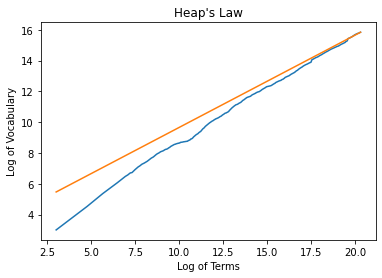

In [ ]:
'''
Plots the log of the total number of words vs
the log of the number of unique words. It compares 
the graph with the projected vocabulary for the number
of words taking beta = 0.6
'''

log_terms = [math.log2(term) for term in terms]
log_vocab = [math.log2(word) for word in vocab]
plt.plot(log_terms,log_vocab)
pro_vocab = [K*(term**beta) for term in terms]
log_pro_vocab = [math.log2(word) for word in pro_vocab]
plt.plot(log_terms, log_pro_vocab)
plt.xlabel("Log of Terms")
plt.ylabel("Log of Vocabulary")
plt.title("Heap's Law")
plt.show()

In [ ]:
'''
Writes the list of lists of words as csv file to use in the next assignment.
'''

with open("words.csv","w") as f:
    wr = csv.writer(f)
    wr.writerows(words)

In [ ]:
with open('words.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = csv.reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)
    print(list_of_rows[0:3])

[['respiratory', 'viruses', 'are', 'common', 'causes', 'of', 'human', 'disease'], ['molecular', 'detection', 'techniques', 'have', 'allowed', 'previously', 'known', 'viruses', 'to', 'be', 'more', 'reliably', 'identified', 'and', 'new', 'viruses', 'to', 'be', 'discovered'], ['molecular', 'techniques', 'such', 'as', 'real-time', 'rt-pcr', 'can', 'be', 'performed', 'for', 'each', 'individual', 'virus', 'or', 'they', 'can', 'be', 'combined', 'into', 'a', 'multiplex', 'rt-rtpcr', 'assay']]
